In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Input, BatchNormalization, LeakyReLU, Dropout
import os.path

In [9]:
model_path = "output/new-model-derivation"

X_train = pd.read_csv(os.path.join(model_path, "train_predictors.csv"))
y_train = pd.read_csv(os.path.join(model_path, "train_response.csv"))

X_test = pd.read_csv(os.path.join(model_path, "test_predictors.csv"))
y_test = pd.read_csv(os.path.join(model_path, "test_response.csv"))

In [28]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
nfeat = X_train.shape[1]

model = Sequential()
model.add(Input(shape=(X_train.shape[1],)))
model.add(Dense(nfeat, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(LeakyReLU(negative_slope=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(nfeat//2, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(LeakyReLU(negative_slope=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(nfeat//4, kernel_regularizer=tf.keras.regularizers.l2(0.001)))
model.add(LeakyReLU(negative_slope=0.01))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

In [30]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.5250 - loss: 0.9537 - val_accuracy: 0.6016 - val_loss: 0.7851
Epoch 2/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.5822 - loss: 0.7796 - val_accuracy: 0.6095 - val_loss: 0.7375
Epoch 3/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6147 - loss: 0.7291 - val_accuracy: 0.6195 - val_loss: 0.7008
Epoch 4/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6298 - loss: 0.6916 - val_accuracy: 0.6169 - val_loss: 0.6803
Epoch 5/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6197 - loss: 0.6764 - val_accuracy: 0.6183 - val_loss: 0.6685
Epoch 6/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6233 - loss: 0.6680 - val_accuracy: 0.6141 - val_loss: 0.6673
Epoch 7/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6318 - loss: 0.6609 - val_accuracy: 0.6196 - val_loss: 0.6646
Epoch 8/100
1111/1111 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.6258 - loss: 0

In [31]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

Test Loss: 0.6550748348236084
Test Accuracy: 0.6257060170173645


In [32]:
y_pred_prob = model.predict(X_test)
y_pred = (model.predict(X_test) > 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'ROC-AUC Score: {roc_auc}')

1389/1389 ━━━━━━━━━━━━━━━━━━━━ 1s 530us/step
1389/1389 ━━━━━━━━━━━━━━━━━━━━ 1s 498us/step
[[13179  8585]
 [ 8049 14628]]
              precision    recall  f1-score   support

           0       0.62      0.61      0.61     21764
           1       0.63      0.65      0.64     22677

    accuracy                           0.63     44441
   macro avg       0.63      0.63      0.63     44441
weighted avg       0.63      0.63      0.63     44441

Accuracy Score: 0.6257059922143966
ROC-AUC Score: 0.6755816910564337


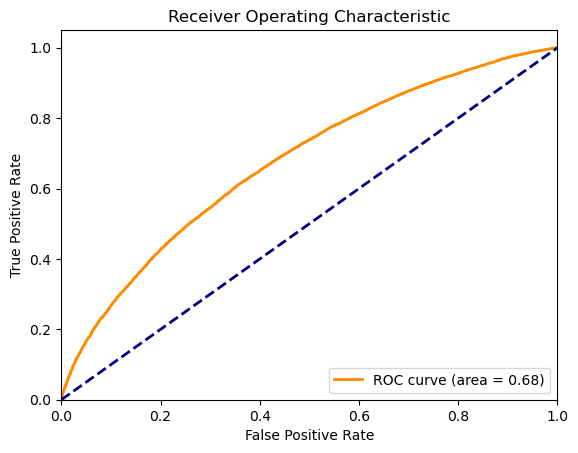

In [33]:
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

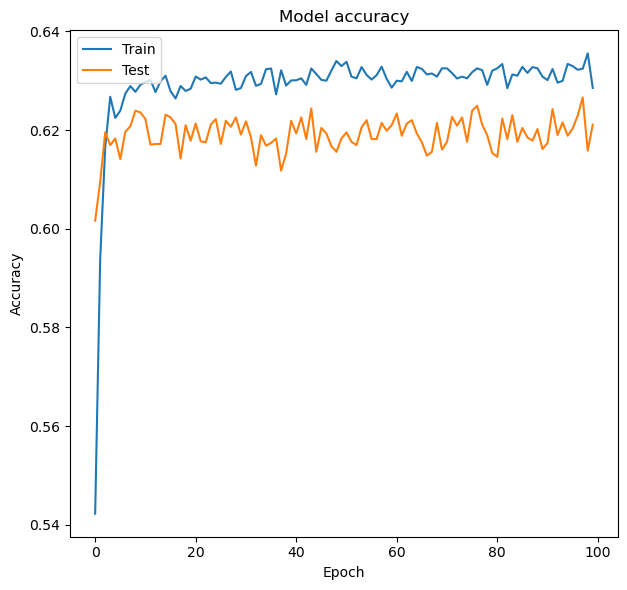

In [34]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()